In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt

api_key = pd.read_json('fmp_api_key.json').iloc[0].to_list()[0]
headers = {'Content-Type': 'application/json'}

In [3]:
### Financial Statements

def get_income_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of income_statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for income statement with revenues and expenses given in millions.  
    """  
    if period == 'FY':
        limit = 120
    else:
        limit = 400
        
    response = requests.get("https://financialmodelingprep.com/api/v3/income-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)    
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_balance_sheet_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of balance-sheet-statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for balance-sheet-statement in $millions.  
    """   
    if period == 'FY':
        limit = 120
    else:
        limit = 400
    response = requests.get("https://financialmodelingprep.com/api/v3/balance-sheet-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_cash_flow_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of cash-flow-statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for cash-flow-statement in $millions.  
    """   
    if period == 'FY':
        limit = 120
    else:
        limit = 400
    response = requests.get("https://financialmodelingprep.com/api/v3/cash-flow-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

### Financial Statements Growth
def get_income_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of income-statement-growth ('FY' only). 
            Inputs must be of string type.
    Outputs: pandas dataframe for income-statement-growth. 
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/income-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)    
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_balance_sheet_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of balance-sheet-statement-growth ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for balance-sheet-statement-growth.
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/balance-sheet-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_cash_flow_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of cash-flow-statement-growth ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for cash-flow-statement-growth.
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/cash-flow-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

### Company Financial Ratios
def get_financial_ratios_ttm(ticker):
    """ 
    Inputs: stock ticker (type: string)
    Outputs: pandas dataframe for company TTM ratios
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/ratios-ttm/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

def get_financial_ratios(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company ratios
    """   
    if period == 'FY':
        limit = 40
    else:
        limit = 140
    response = requests.get("https://financialmodelingprep.com/api/v3/ratios/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df


### Company Key Metrics
def get_key_metrics_ttm(ticker):
    """ 
    Inputs: stock ticker (type: string)
    Outputs: pandas dataframe for company TTM key metrics
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/key-metrics-ttm/" +
                       ticker + "?limit=40" + "&apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())        
        return df
    
    else:
        pass
    
def get_key_metrics(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company key metrics
    """   
    if period == 'FY':
        limit = 40
    else:
        limit = 130
        
    response = requests.get("https://financialmodelingprep.com/api/v3/key-metrics/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())
        df['date'] = pd.to_datetime(df['date'])
        df.set_index(['symbol', 'date'], inplace=True)
        
        return df
    
    else:
        pass

### Company Financial Growth
def get_financial_growth(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company financial growth
    """   
    if period == 'FY':
        limit = 20
    else:
        limit = 80
    response = requests.get("https://financialmodelingprep.com/api/v3/financial-growth/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

### Company Discounted cash flow value
def get_discounted_cash_flow(ticker):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/discounted-cash-flow/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_hist_discounted_cash_flow(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company historical discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical-discounted-cash-flow/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json()[0]['historicalDCF'])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date'], inplace=True)
        
    return df

def get_hist_discounted_cash_flow_daily(ticker):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company daily historical discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical-daily-discounted-cash-flow/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

# Earnings Calendar
def get_earnings_calendar():
    """ 
    Inputs: none
    Outputs: dataframe for earnings calendar
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/earning_calendar/" +
                       "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

# Company Profile
def get_profile(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company profile
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/profile/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())
        
        return df.transpose()
    
    else:
        pass

# Institutional holders
def get_institutional_holder(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: dataframe for institutional holders
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/institutional-holder/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())    
    
    return df

# Earnings Surprises
def get_earnings_surprises(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company earning-surprises
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/earnings-surprises/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    df['earningSurprise'] =  ((df['actualEarningResult'] - df['estimatedEarning']) / abs(df['estimatedEarning'])) * 100
    
    return df

# Key Executives
def get_key_executives(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company key executives
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/key-executives/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

### Stock Screener
- marketCapMoreThan & marketCapLowerThan : Number
- priceMoreThan & priceLowerThan : Number
- betaMoreThan & betaLowerThan : Number
- volumeMoreThan & volumeLowerThan : Number
- dividendMoreThan & dividendLowerThan : Number
- isEtf & isActivelyTrading : true/false
- sector : Consumer Cyclical - Energy - Technology - Industrials - Financial Services - Basic Materials - Communication Services - Consumer Defensive - Healthcare - Real Estate - Utilities - Industrial Goods - Financial - Services - Conglomerates
- Industry : Autos - Banks - Banks Diversified - Software - Banks Regional - Beverages Alcoholic - Beverages Brewers - Beverages - Non-Alcoholic
- Country : US - UK - MX - BR - RU - HK - CA - ...
- exchange : nyse - nasdaq - amex - euronex - tsx - etf - mutual_fund
- limit : Number

Large Cap >= 10B

2B =< Mid Cap < 10B

0.3B < Small Cap < 2B

In [ ]:
profile = get_profile('NWSA').iloc[[0,4,9,14,15,19,20,17]]
profile

In [ ]:
profile.loc['mktCap']/1.0e9

In [4]:
large_cap = 10000000000
mid_cap = 2000000000
small_cap = 300000000

params = {'sector': 'Industrials',
          #'industry': 'Specialty Industrial Machinery',
          'country': 'US',
          #'exchange': 'NASDAQ',
          'isEtf': False,
          'marketCapLowerThan': large_cap,
          'marketCapMoreThan': mid_cap,
          'volumeMoreThan': 100000,
          'limit': 300}

def get_stock_screener(params):
    response = requests.get("https://financialmodelingprep.com/api/v3/stock-screener?" 
                            + 'marketCapLowerThan=' + str(params['marketCapLowerThan'])
                            + '&marketCapMoreThan=' + str(params['marketCapMoreThan'])
                            + '&volumeMoreThan=' + str(params['volumeMoreThan'])
                            + '&sector=' + str(params['sector'])
                            #+ '&industry=' + str(params['industry'])
                            + '&country=' + str(params['country'])
                            #+ '&exchange=' + str(params['exchange'])
                            + '&isEtf=' + str(params['isEtf'])
                            + '&limit=' + str(params['limit'])
                            + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df.set_index(['symbol'], inplace=True)
    
    return df

### Initial screening by sector and market cap

In [5]:
screened_tickers = get_stock_screener(params)
tickers = screened_tickers.index.to_list()
print(tickers[:])
print('\n')
print("number of screened tickers =", len(tickers))

['ACM', 'RHI', 'NLSN', 'MIDD', 'CSL', 'ALK', 'HDS', 'HII', 'KNX', 'OSK', 'SITE', 'WMS', 'ITT', 'ADT', 'IAA', 'OA', 'WWD', 'TTEK', 'VRT', 'DCI', 'MTZ', 'LECO', 'BLD', 'AZEK', 'SPCE', 'WSC', 'JBLU', 'LPX', 'LSTR', 'EME', 'BWXT', 'GWR', 'SRCL', 'SAIA', 'TKR', 'AYI', 'UPWK', 'MSA', 'CFX', 'RBC', 'RXN', 'MMS', 'MAN', 'ASGN', 'AL', 'CR', 'KBR', 'CAR', 'TNET', 'EXPO', 'GTLS', 'FLS', 'CW', 'SPR', 'MSM', 'VMI', 'ROLL', 'FCN', 'GTES', 'CLH', 'HXL', 'SSD', 'ULCC', 'AEIS', 'AWI', 'SNDR', 'APG', 'NAV', 'WCC', 'JBT', 'MRCY', 'PSN', 'BE', 'R', 'ALGT', 'FCEL', 'REZI', 'ENS', 'WTS', 'BCO', 'AIMC', 'BECN', 'AJRD', 'HI', 'FELE', 'KEX', 'AIT', 'AAON', 'SAVE', 'BMCH', 'IBP', 'ABM', 'KFY', 'KMT', 'KTOS', 'CVON', 'CWST', 'ATKR', 'ENR', 'GATX', 'NSP', 'AQUA', 'WERN', 'KLXI', 'FLR', 'MATX', 'TRN', 'RCII', 'PRLB', 'EAF', 'TEX', 'DOOR', 'ACA', 'DY', 'PRG', 'ROCK', 'HRI', 'FIX', 'JELD', 'BRC', 'ARNC', 'VVNT', 'ATI', 'AVAV', 'MIC', 'FLOW', 'BMI', 'MOG-A', 'ADSW', 'SPXC', 'SKYW', 'B', 'PAY', 'MLHR', 'AMRC', 'MLI', 

### Industries

In [6]:
# find industries of the screened stock tickers
def get_industries_from_profiles(tickers):
    
    temp = []

    for ticker in tickers:
        df_industry = get_profile(ticker).loc[['symbol', 'industry']]
        temp.append(df_industry)
    
    df = pd.concat(temp, axis=1)
    df = df.transpose()
    df.columns = ['symbol', 'industry']
    df.reset_index(drop=True, inplace=True)
    
    return df

In [7]:
df_industry = get_industries_from_profiles(tickers)
df_industry['industry'].value_counts()

Specialty Industrial Machinery         25
Building Products & Equipment          14
Aerospace & Defense                    14
Engineering & Construction             11
Rental & Leasing Services              10
Electrical Equipment & Parts           10
Security & Protection Services          7
Staffing & Employment Services          7
Airlines                                6
Industrial Distribution                 5
Integrated Freight & Logistics          4
Metal Fabrication                       4
Tools & Accessories                     4
Waste Management                        4
Trucking                                4
Farm & Heavy Construction Machinery     4
Specialty Business Services             3
Consulting Services                     3
Marine Shipping                         2
Business Services                       2
Railroads                               2
Pollution & Treatment Controls          2
Business Equipment & Supplies           1
Industrial Products               

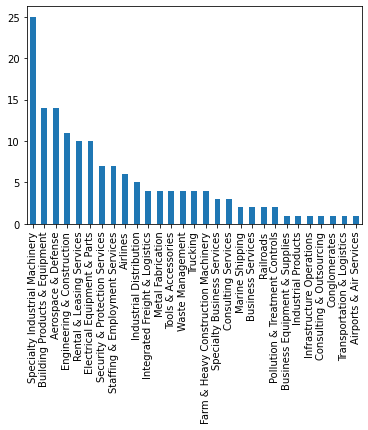

In [8]:
df_industry['industry'].value_counts().plot.bar();

### Key Metrics

In [9]:
def get_key_metrics_tickers(tickers, period):
    """
    Input: a list of stock tickers and period ('FY', or 'quarter')
    Output: pandas dataframe for selected key metrics
    """ 
    metrics = [
        'peRatio',
        'enterpriseValueOverEBITDA',
        'evToSales',
        'freeCashFlowYield',
        'debtToEquity',
        'roic',
        'roe',
        'salesGeneralAndAdministrativeToRevenue',
        'researchAndDdevelopementToRevenue'
    ]
    
    dataframes = []
    
    for ticker in (tickers):
        df = get_key_metrics(ticker, period)
        dataframes.append(df)
    df = pd.concat(dataframes)
    df['peRatio'] = pd.to_numeric(df['peRatio'])
    df['enterpriseValueOverEBITDA'] = pd.to_numeric(df['enterpriseValueOverEBITDA'])
    df['evToSales'] = pd.to_numeric(df['evToSales'])
    df['freeCashFlowYield'] = pd.to_numeric(df['freeCashFlowYield'])
    df['debtToEquity'] = pd.to_numeric(df['debtToEquity'])
    df['roic'] = pd.to_numeric(df['roic'])
    df['roe'] = pd.to_numeric(df['roe'])
    df['salesGeneralAndAdministrativeToRevenue'] = pd.to_numeric(df['salesGeneralAndAdministrativeToRevenue'])
    df['researchAndDdevelopementToRevenue'] = pd.to_numeric(df['researchAndDdevelopementToRevenue'])
    df_metrics = df[metrics]
    df_metrics = df_metrics.rename(columns={'enterpriseValueOverEBITDA': 'EV/EBITDA', 
                       'salesGeneralAndAdministrativeToRevenue': 'SG&A/revenue', 
                       'researchAndDdevelopementToRevenue': 'R&D/revenue' })
    
    return df_metrics


def make_comparison_plot(df_0, ticker_a, ticker_b, metrics):
    
    df_a = df_0.loc[ticker_a][metrics][:20].sort_index()
    df_b = df_0.loc[ticker_b][metrics][:20].sort_index()
    df = pd.concat([df_a, df_b], axis=1)
    df.columns = [metrics + '_' + ticker_a, metrics + '_' + ticker_b]
    ax = df.plot.bar(figsize=(10,7), grid=True)
    ax.set_xlabel('')
    ax.set_ylabel(metrics, fontsize=14)
    plt.tight_layout()
    
    return ax   

### Tickers selection
get quarterly key metrics for given sector and market cap

In [10]:
df_metrics_quarter = get_key_metrics_tickers(tickers, 'quarter')

In [ ]:
#tickers_selected = df_metrics_quarter.index.get_level_values(0).unique().to_list()
#print("number of selected tickers =", len(tickers_selected))

In [24]:
# get interquartile range of P/E for the last four quarters
df_last4q = df_metrics_quarter.groupby('symbol').head(4)
pe_25 = df_last4q['peRatio'].groupby('symbol').min().describe()['25%']
pe_75 = df_last4q['peRatio'].groupby('symbol').max().describe()['75%']
IQR = pe_75 - pe_25
print("pe_25=", pe_25)
print("pe_75=", pe_75)
print("interquartile range=", IQR)

pe_25= -22.854212437963852
pe_75= 69.70810608836625
interquartile range= 92.5623185263301


In [27]:
# Remove outliers
tickers_ignored = set(df_last4q[(df_last4q['peRatio'] <= pe_25 - IQR) | (df_last4q['peRatio'] >= pe_75 + IQR)].index.get_level_values(0).unique())
all_tickers = set(df_metrics_quarter.index.get_level_values(0).unique())
tickers_selected = list(all_tickers - tickers_ignored)
print(tickers_selected)
print('\n')
print("number of selected tickers =", len(tickers_selected))

['RBC', 'PRLB', 'MSA', 'CR', 'WSC', 'MSM', 'GTES', 'OA', 'MIDD', 'SAIA', 'AWI', 'SPCE', 'HLIO', 'SKYW', 'RXN', 'FELE', 'AMRC', 'KMT', 'FLOW', 'HUBG', 'SNDR', 'FSS', 'FTAI', 'FCN', 'BDC', 'KBR', 'BRC', 'ROCK', 'AEIS', 'TKR', 'AYI', 'ACA', 'TRN', 'ADT', 'IBP', 'OSK', 'KEX', 'JBLU', 'CSL', 'KNX', 'SSD', 'MRCY', 'EAF', 'MMS', 'PRG', 'HI', 'SAVE', 'MTZ', 'BWXT', 'LPX', 'WTS', 'ARNC', 'CYRX', 'AL', 'ASGN', 'AIMC', 'ALK', 'SPXC', 'CLH', 'FIX', 'MATX', 'CFX', 'EXPO', 'VMI', 'FLR', 'CAR', 'ACM', 'WCC', 'BECN', 'MLI', 'ALGT', 'TTEK', 'TEX', 'R', 'NAV', 'ATKR', 'GATX', 'DY', 'ABM', 'GWR', 'SPR', 'FCEL', 'GTLS', 'HII', 'AAON', 'RHI', 'VVNT', 'WBT', 'MLHR', 'HRI', 'LECO', 'JBT', 'TNET', 'BMCH', 'AJRD', 'WERN', 'SSW', 'RCII', 'AQUA', 'FWRD', 'DCI', 'MWA', 'IAA', 'SITE', 'PSN', 'WWD', 'MOG-A', 'CTOS', 'EME', 'VRT', 'LSTR', 'AYR', 'APG', 'CW', 'ENR', 'BMI', 'BLD', 'BE', 'MIC', 'ATI']


number of selected tickers = 120


In [28]:
# Selected tickers' statistic
quarterly_stat = df_metrics_quarter.loc[tickers_selected].describe().transpose()
quarterly_stat

,count,mean,std,min,25%,50%,75%,max
peRatio,9249.0,23.894482,405.282508,-4649.975453,9.310942,15.491072,22.699653,28802.026930
EV/EBITDA,9296.0,38.960134,623.372779,-10291.932740,21.403265,32.714804,45.477412,49904.400000
evToSales,9270.0,16.296590,286.917180,-135.429182,2.807641,4.315030,6.645942,15552.784695
freeCashFlowYield,9268.0,-0.422299,40.996305,-3945.904222,-0.007939,0.010183,0.026505,60.422005
debtToEquity,9294.0,-0.404841,98.601288,-9454.138122,0.119005,0.423998,0.910646,154.295455
roic,9246.0,0.031792,0.704940,-52.496144,0.015760,0.030535,0.048042,27.147860
roe,9294.0,1.197234,113.043786,-135.340517,0.016487,0.031861,0.048352,10896.591160
SG&A/revenue,9270.0,0.201332,8.486328,-212.336283,0.070133,0.138352,0.213952,582.148992
R&D/revenue,9270.0,0.036432,1.524201,-1.672411,0.000000,0.000000,0.000000,144.042017


(-1000.0, 1500.0)

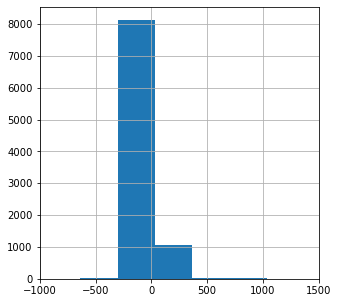

In [51]:
fig, ax = plt.subplots(figsize=(5,5))
df_metrics_quarter.loc[tickers_selected]['peRatio'].hist(bins=100)
ax.set_xlim(-1000, 1500)


### Get key metrics for selected tickers
FY

In [29]:
df_metrics = get_key_metrics_tickers(tickers_selected, 'FY')
df_metrics.head()

peRatio  EV/EBITDA  evToSales  freeCashFlowYield  \
symbol date                                                             
RBC    2021-01-02  26.644559  13.141209   1.645476           0.075451   
       2019-12-28  14.236752   8.706055   1.305639           0.092939   
       2018-12-29  13.930364   8.742746   1.173661           0.088521   
       2017-12-30  16.370892   9.388615   1.305627           0.065013   
       2017-01-07  15.431580   7.453269   0.954777           0.115962   

                   debtToEquity      roic       roe  SG&A/revenue  R&D/revenue  
symbol date                                                                     
RBC    2021-01-02      0.090802  0.074330  0.075865           0.0          0.0  
       2019-12-28      0.483561  0.090719  0.101612           0.0          0.0  
       2018-12-29      0.565505  0.088064  0.100065           0.0          0.0  
       2017-12-30      0.447173  0.089794  0.091593           0.0          0.0  
       2017-01-07      0.067223  0.087503  0.102552           0.0          0.0

In [30]:
df_metrics.dropna().index.get_level_values(0).nunique()

118

In [31]:
FY_stat = df_metrics.dropna().describe().transpose()
FY_stat

,count,mean,std,min,25%,50%,75%,max
peRatio,2633.0,25.594493,440.247185,-9178.982680,7.980297,15.470162,22.761127,10698.504229
EV/EBITDA,2633.0,-171.376263,8995.592969,-461262.456441,5.332827,8.457518,12.008755,3640.833487
evToSales,2633.0,38.315265,1182.335953,-137.179456,0.647346,1.039578,1.672102,50160.959885
freeCashFlowYield,2633.0,0.853276,34.059804,-567.375887,0.000230,0.043533,0.081149,1463.519313
debtToEquity,2633.0,-2.504099,185.056294,-9454.138122,0.141712,0.479015,0.998517,832.000000
roic,2633.0,14.863084,756.965402,-2.394634,0.061990,0.114994,0.177236,38842.094656
roe,2633.0,22.413775,818.049931,-63.814815,0.062770,0.120913,0.174419,33568.286588
SG&A/revenue,2633.0,0.337495,10.338239,-183.501524,0.034809,0.130007,0.206264,489.882353
R&D/revenue,2633.0,0.283696,13.018340,0.000000,0.000000,0.000000,0.000000,667.046218


In [32]:
FY_stat['50%'].to_frame().transpose()

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
50%,15.470162,8.457518,1.039578,0.043533,0.479015,0.114994,0.120913,0.130007,0.0


In [33]:
df_metrics.dropna().groupby(level=0).median().sort_values(by=['peRatio', 'EV/EBITDA', 'evToSales', 'debtToEquity'])

,peRatio,EV/EBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe,SG&A/revenue,R&D/revenue
symbol,,,,,,,,,
APG,-2711.790626,-2707.741705,845.681720,0.000069,0.574155,-0.020443,-0.092642,0.184884,0.000000
SPCE,-23.644282,-21.852440,17064.469852,-0.048081,0.000234,-0.417527,-0.431629,255.806820,351.094254
CTOS,-11.219540,28.431506,3.381830,-0.390083,-40.912086,0.048944,1.457524,0.142297,0.000000
ADT,-10.669859,7.725412,3.267880,0.117295,2.939748,0.021545,-0.133198,0.274410,0.000000
WSC,-8.390141,29.501600,3.411156,-0.107486,1.434430,0.010382,-0.076839,0.307400,0.000000
...,...,...,...,...,...,...,...,...,...
ENR,37.261475,18.638536,2.450768,0.057332,0.679273,0.190254,0.155754,0.206735,0.013747
PRLB,43.221224,24.658581,7.414084,0.010823,0.000000,0.158047,0.141438,0.112515,0.072521
SITE,51.101817,24.372078,1.899890,0.027552,1.866137,0.132831,0.205645,0.270902,0.000000


In [ ]:
df_metrics.dropna().groupby(level=0).mean().sort_values(by=['freeCashFlowYield', 'roic', 'roe'], ascending=False).head()

In [ ]:
df_metrics.dropna().groupby(level=0).median().sort_values(by=['debtToEquity'], ascending=False).head(10)

### Check interesting stocks
quarterly key metrics

In [ ]:
ticker_of_interest = 'RBC'

In [ ]:
profile = get_profile(ticker_of_interest)
profile.iloc[[0, 4, 9, 14, 15, 17, 19, 20,]]

In [ ]:
df_stock_metrics = df_metrics_quarter.loc[ticker_of_interest]
df_stock_metrics.head()

In [ ]:
quarterly_stat.loc[['peRatio', 'EV/EBITDA']]

In [ ]:
df_stock_metrics[['peRatio', 'EV/EBITDA']][:20].sort_index().plot.bar(grid=True, figsize=(10,7));
plt.axhline(y = quarterly_stat.loc['peRatio']['50%'], lw=1.2,ls='--', color='b');
plt.axhline(y = quarterly_stat.loc['EV/EBITDA']['50%'], lw=1.2,ls='--', color='r');

In [ ]:
quarterly_stat.loc[['evToSales']]

In [ ]:
df_stock_metrics['evToSales'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['evToSales']['50%'], lw=1.2,ls='--', color='m');

In [ ]:
quarterly_stat.loc[['freeCashFlowYield']]

In [ ]:
df_stock_metrics['freeCashFlowYield'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['freeCashFlowYield']['50%'], lw=1.2,ls='--', color='m');

In [ ]:
quarterly_stat.loc[['roic', 'roe']]

In [ ]:
df_stock_metrics[['roic', 'roe']][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['roic']['50%'], lw=1.2,ls='--', color='b');
plt.axhline(y = quarterly_stat.loc['roe']['50%'], lw=1.2,ls='--', color='r');

In [ ]:
quarterly_stat.loc[['debtToEquity']]

In [ ]:
df_stock_metrics['debtToEquity'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['debtToEquity']['50%'], lw=1.2,ls='--', color='m');

### Income Statement

In [ ]:
df_income = get_income_statement(ticker_of_interest, 'FY')
df_income.head()

In [ ]:
df_income.loc[ticker_of_interest][['revenue', 'grossProfit', 'netIncome']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

In [ ]:
df_income.loc[ticker_of_interest][['netIncome']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

In [ ]:
df_income.loc[ticker_of_interest][['ebitda']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

In [ ]:
df_income.loc[ticker_of_interest][['eps']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

### Cashflow Statement

In [ ]:
df_cashflow = get_cash_flow_statement(ticker_of_interest, 'FY')
df_cashflow.head()

In [ ]:
df_cashflow.loc[ticker_of_interest][['freeCashFlow']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

### Comparison
check for both FY and quarter

In [ ]:
metrics = df_metrics.columns.to_list()

for metric in metrics:
    make_comparison_plot(df_metrics_quarter, 'CW', 'RBC', metric);

In [ ]:
earning_calender = get_earnings_calendar()

In [ ]:
earning_calender.loc['RBC']